# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

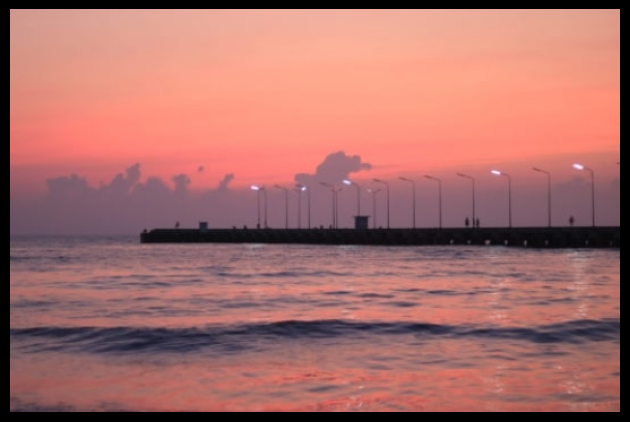

In [2]:
### START CODE HERE ###
img = cv2.imread("./assets/view.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.style.use("dark_background")

plt.imshow(rgb_img)
plt.axis("off")

plt.tight_layout()
plt.show()
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [3]:
### START CODE HERE ###
def plot_histogram(image):
    hist_lst = []
    for i in range(0, 3) :
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hist_lst.append(hist)

    return hist_lst
### END CODE HERE ###

# image(list of image), 
# channel(use channel to count [0] = one channel for gray scale), 
# mask(none = use whole img), 
# hist_size(numbers of bin 256 = 0-255), 
# range (intensity range 0-256 / OpenCV half-open: 0 - <256)

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

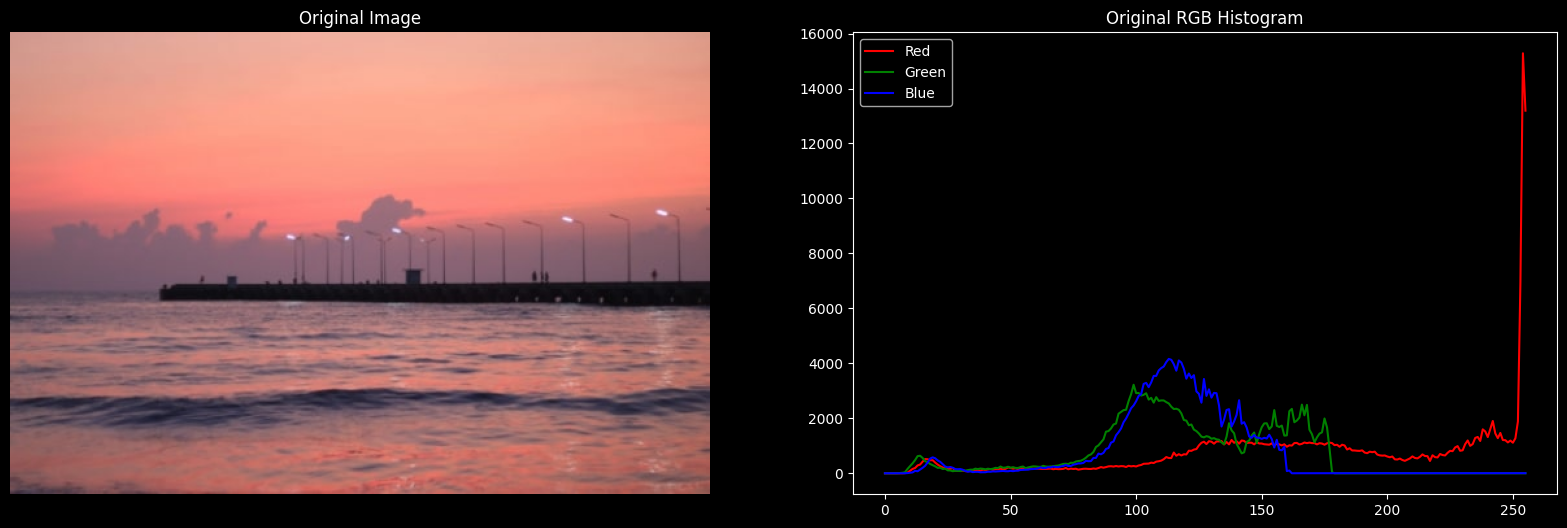

In [4]:
### START CODE HERE ###

hist = plot_histogram(rgb_img)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].imshow(rgb_img)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].plot(hist[0], color='r')
axs[1].plot(hist[1], color='g')
axs[1].plot(hist[2], color='b')
axs[1].set_title("Original RGB Histogram")
plt.legend(["Red", "Green", "Blue"])

plt.show()

### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

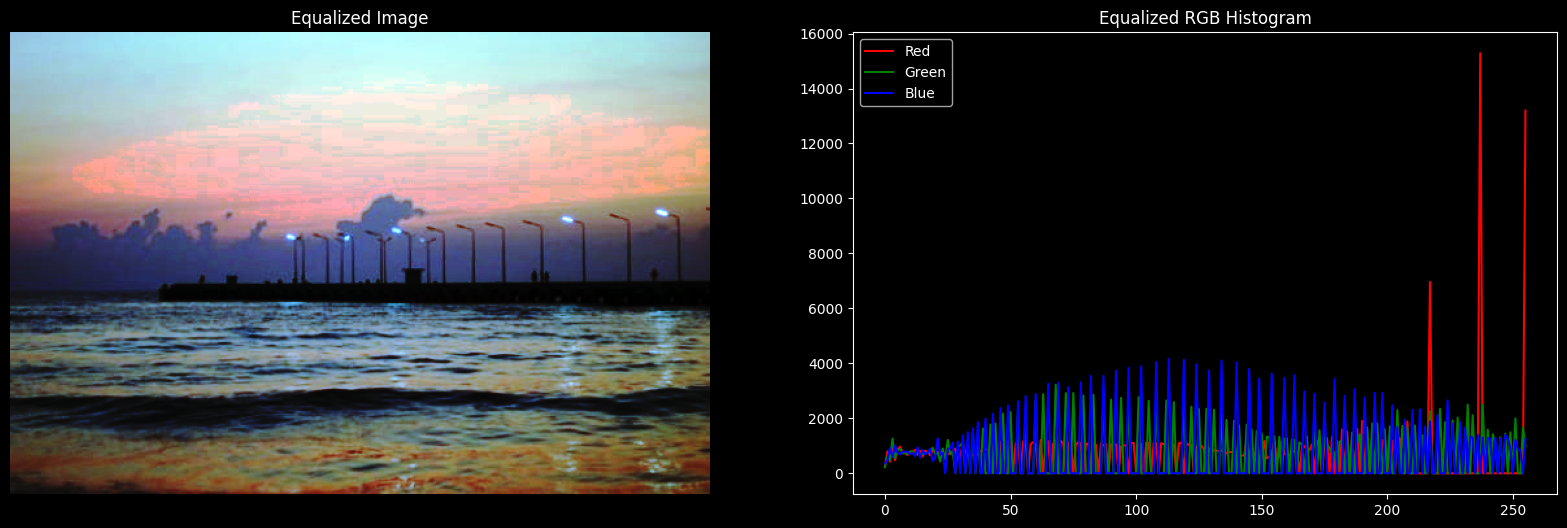

In [5]:
### START CODE HERE ###
 
# equalize only one channel  -> equalize each channel -> merge channel -> eql image

# split channel
r_ch, g_ch, b_ch = cv2.split(rgb_img)

# equalize each channel
eql_r = cv2.equalizeHist(r_ch)
eql_g = cv2.equalizeHist(g_ch)
eql_b = cv2.equalizeHist(b_ch)

# merge channel
eql_img = cv2.merge((eql_r, eql_g, eql_b))

eql_hst = plot_histogram(eql_img)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

axs[0].imshow(eql_img)
axs[0].set_title("Equalized Image")
axs[0].axis("off")

axs[1].plot(eql_hst[0], color='r')
axs[1].plot(eql_hst[1], color='g')
axs[1].plot(eql_hst[2], color='b')

axs[1].set_title("Equalized RGB Histogram")
plt.legend(["Red", "Green", "Blue"])

plt.show()
 
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [6]:
### START CODE HERE ###


img1 = cv2.imread("./assets/view.jpg")
img2 = cv2.imread("./assets/wave.jpg")

rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

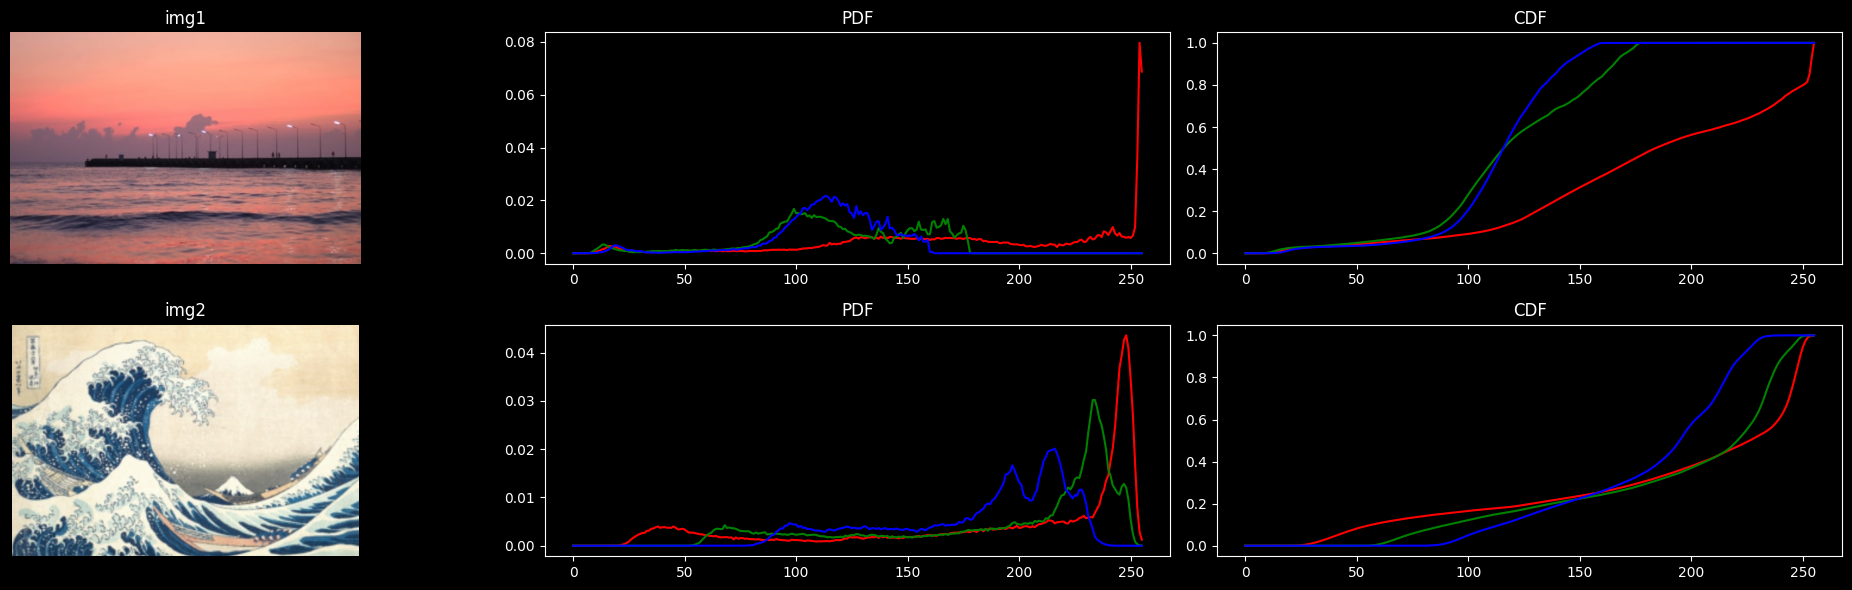

In [7]:
### START CODE HERE ###

# create pdf function
def pdf(image) :
    pdf_lst = []
    for i in range(0, 3) :
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        pdf_lst.append(hist / hist.sum())

    return pdf_lst

# create cdf funstion
def cdf(pdf_lst) :
    cdf_lst = []
    for pdf in pdf_lst :
        cdf = np.cumsum(pdf)
        cdf_lst.append(cdf)
    
    return cdf_lst

fig, axs = plt.subplots(2, 3, figsize=(20, 6))

# img1
axs[0, 0].imshow(rgb_img1)
axs[0, 0].set_title("img1")
axs[0, 0].axis("off")

# img1 pdf : norm hist(sum = 1) -> frequency each bin / all pixel = prob intensity

pdf_img1 = pdf(rgb_img1)

axs[0, 1].plot(pdf_img1[0], color='r')
axs[0, 1].plot(pdf_img1[1], color='g')
axs[0, 1].plot(pdf_img1[2], color='b')
axs[0, 1].set_title("PDF")

# img1 cdf : cumulative sum of pdf -> prob intensity less than or equal to x
cdf_lst_img1 = cdf(pdf_img1)
axs[0, 2].plot(cdf_lst_img1[0], color='r')
axs[0, 2].plot(cdf_lst_img1[1], color='g')
axs[0, 2].plot(cdf_lst_img1[2], color='b')
axs[0, 2].set_title("CDF")


# img2
axs[1, 0].imshow(rgb_img2)
axs[1, 0].set_title("img2")
axs[1, 0].axis("off")

# img2 pdf : norm hist(sum = 1) -> frequency each bin / all pixel = prob intensity

pdf_img2 = pdf(rgb_img2)

axs[1, 1].plot(pdf_img2[0], color='r')
axs[1, 1].plot(pdf_img2[1], color='g')
axs[1, 1].plot(pdf_img2[2], color='b')
axs[1, 1].set_title("PDF")

# img1 cdf : cumulative sum of pdf -> prob intensity less than or equal to x
cdf_lst_img2 = cdf(pdf_img2)
axs[1, 2].plot(cdf_lst_img2[0], color='r')
axs[1, 2].plot(cdf_lst_img2[1], color='g')
axs[1, 2].plot(cdf_lst_img2[2], color='b')
axs[1, 2].set_title("CDF")

plt.tight_layout()
plt.show()

### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

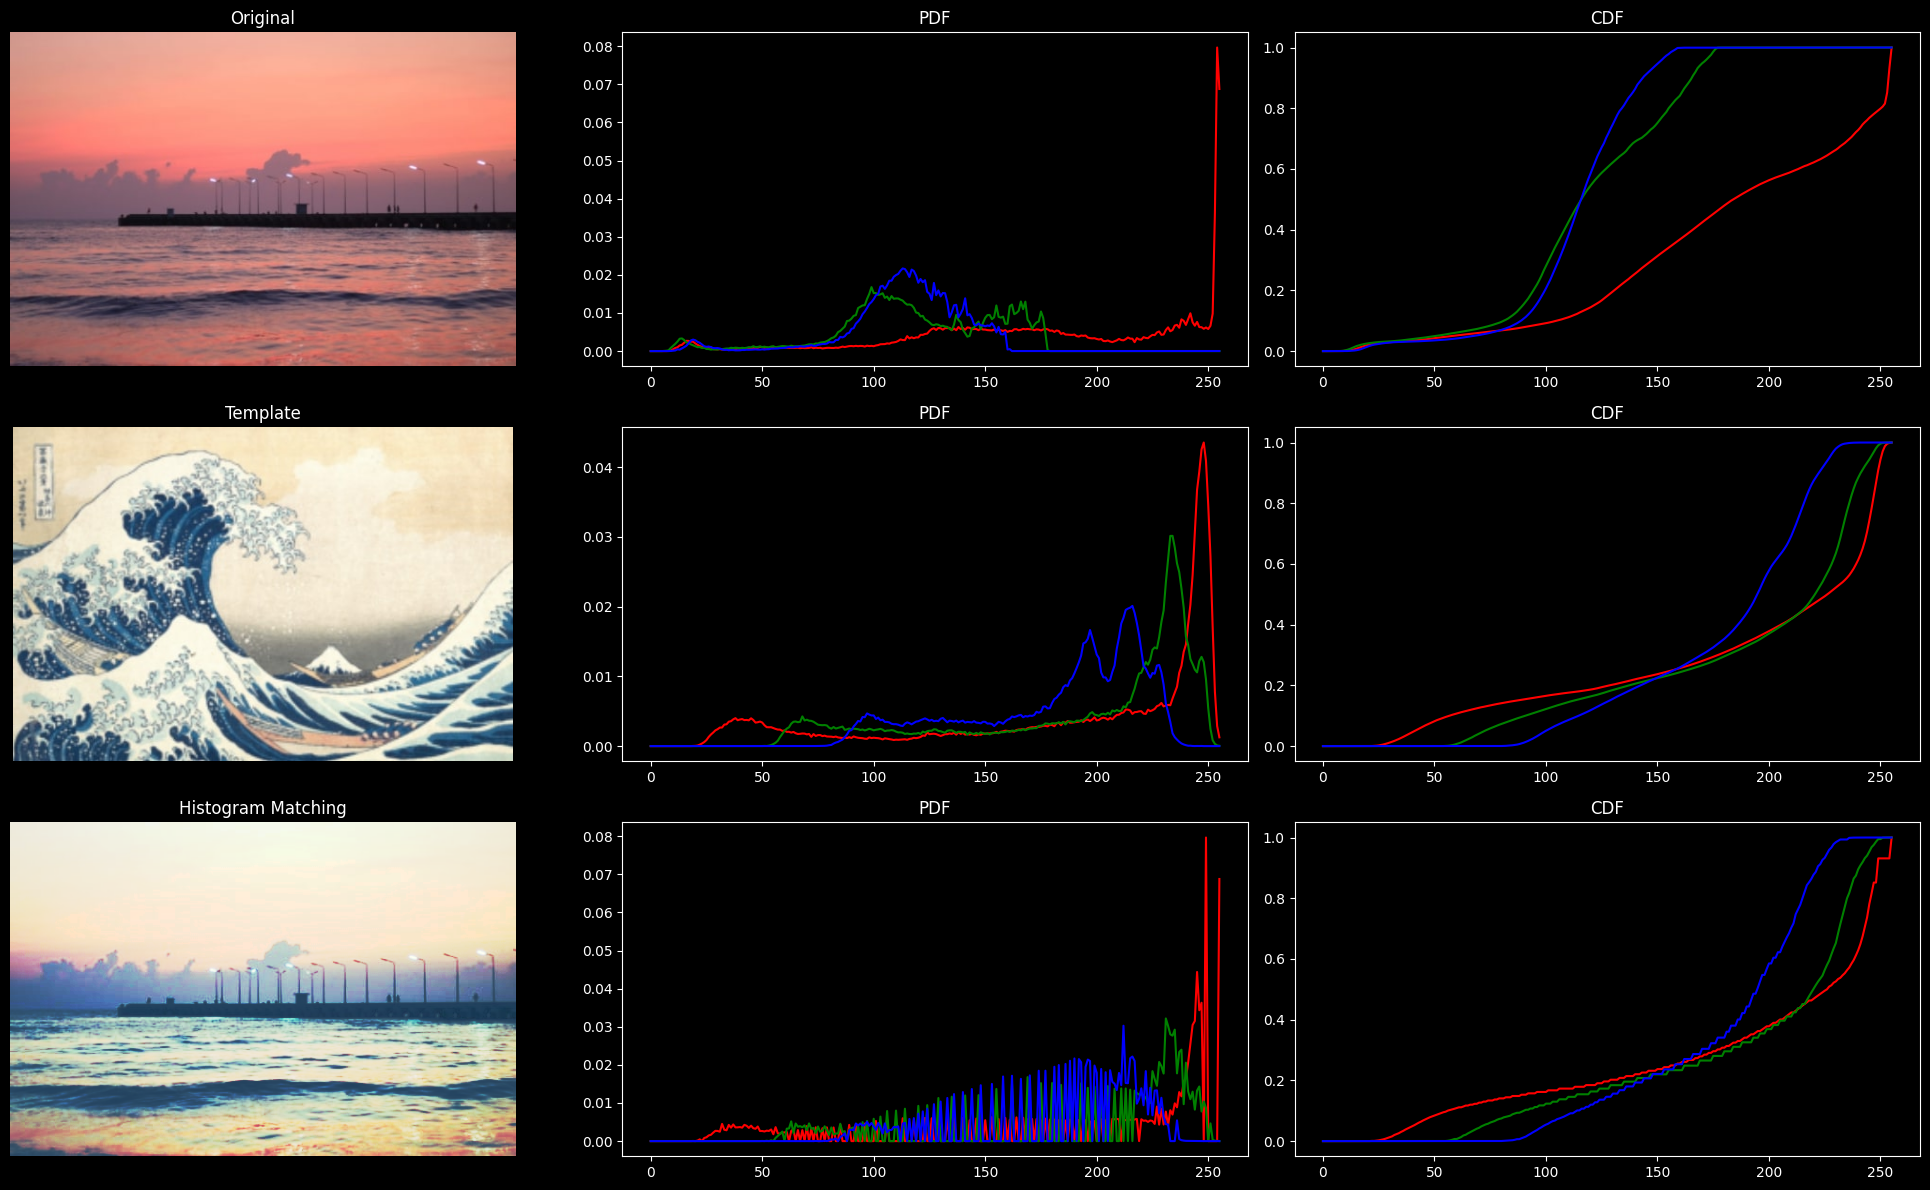

In [8]:
### START CODE HERE ###

fig, axs = plt.subplots(3, 3, figsize=(20, 12))

# original
axs[0, 0].imshow(rgb_img1)
axs[0, 0].set_title("Original")
axs[0, 0].axis("off")

# pdf original
pdf_original = pdf(rgb_img1)
axs[0, 1].plot(pdf_original[0], color='r')
axs[0, 1].plot(pdf_original[1], color='g')
axs[0, 1].plot(pdf_original[2], color='b')
axs[0, 1].set_title("PDF")

# cdf original
cdf_original = cdf(pdf_original)
axs[0, 2].plot(cdf_original[0], color='r')
axs[0, 2].plot(cdf_original[1], color='g')
axs[0, 2].plot(cdf_original[2], color='b')
axs[0, 2].set_title("CDF")

#------------------------------------------------------------

# template
axs[1, 0].imshow(rgb_img2)
axs[1, 0].set_title("Template")
axs[1, 0].axis("off")

# pdf template
pdf_template = pdf(rgb_img2)
axs[1, 1].plot(pdf_template[0], color='r')
axs[1, 1].plot(pdf_template[1], color='g')
axs[1, 1].plot(pdf_template[2], color='b')
axs[1, 1].set_title("PDF")

# cdf template
cdf_template = cdf(pdf_template)
axs[1, 2].plot(cdf_template[0], color='r')
axs[1, 2].plot(cdf_template[1], color='g')
axs[1, 2].plot(cdf_template[2], color='b')
axs[1, 2].set_title("CDF")

#------------------------------------------------------------

# Histogram Matching

# from skimage.exposure import match_histograms

# match_hst = match_histograms(rgb_img1, rgb_img2, channel_axis=-1)

# axs[2, 0].imshow(match_hst)
# axs[2, 0].set_title("Histogram Matching")
# axs[2, 0].axis("off")

# create match histigram function
def match_histogram(image, template) :

    # create empty output image
    matched_image = np.zeros_like(image)

    # pdf of images
    pdf_image = pdf(image)
    pdf_template = pdf(template)

    # cdf of images
    cdf_image = cdf(pdf_image)
    cdf_template = cdf(pdf_template)

    # create mapping
    for i in range(0, 3) :
        mapping = np.interp(cdf_image[i], cdf_template[i], np.arange(256))
        # np.interp(x, xp, fp) สำหรับค่าใน x → หาในตาราง (xp, fp)

        matched_image[:, :, i] = mapping[image[:, :, i]]
    
    return matched_image


matched_img = match_histogram(rgb_img1, rgb_img2)

# matching histogram
axs[2, 0].imshow(matched_img)
axs[2, 0].set_title("Histogram Matching")
axs[2, 0].axis("off")


# pdf matching histogram
pdf_matching = pdf(matched_img)
axs[2, 1].plot(pdf_matching[0], color='r')
axs[2, 1].plot(pdf_matching[1], color='g')
axs[2, 1].plot(pdf_matching[2], color='b')
axs[2, 1].set_title("PDF")

# cdf matching histogram
cdf_matching = cdf(pdf_matching)
axs[2, 2].plot(cdf_matching[0], color='r')
axs[2, 2].plot(cdf_matching[1], color='g')
axs[2, 2].plot(cdf_matching[2], color='b')
axs[2, 2].set_title("CDF")

plt.tight_layout()
plt.show()

### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

## **Answer**

1. ในกรณีสว่างมากเกินไป ใช้ linear operation ในการแต่งภาพ โดยที่กำหนดให้ b เป็นค่าติดลบ ยิ่งติดลบมาก ยิ่งได้ภาพที่มีความมืดมากขึ้น
2. ในกรณีอิ่มตัวมากเกินไป ใช้ gamma operation โดยที่กำหนดให้ค่าของ gamma อยู่ในช่วง (0,1) จะได้ภาพผลลัพธ์ที่มีความอิ่มตัวน้อยลง
3. ปรับภาพให้เป็น grayscale ก่อน จากนั้นใช้ linear operation ในการแต่งภาพ โดยที่กำหนดให้ a เป็นค่าติดลบ (เมื่อวาดกราฟจะได้กราฟเส้นตรงที่มีความชันเป็นลบ) ภาพที่ออกมาจะได้ภาพที่กลับสีกัน จากขาวเป็นดำ จากดำเป็นขาว